In [1]:
from eodhd import APIClient
import pandas as pd

In [2]:
api_key = "5cb671b0b4a790.35526238"
api = APIClient(api_key)

In [3]:
import json
with open('../industries.json', 'r') as json_file:
    all_industries = json.load(json_file)
sector = 'Conglomerates'
industry_list = all_industries[sector]

In [5]:
print(industry_list)

['Conglomerates']


In [6]:
limit = 100
offset = 0
all_data = []
from urllib.parse import urlencode
import requests
base_url = "https://eodhd.com/api/screener"

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NYSE"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NASDAQ"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit


print(len(all_data))
Hcdf = pd.DataFrame(all_data)
print(Hcdf)

{'data': [{'code': 'MMM', 'name': '3M Company', 'last_day_data_date': '2024-06-17', 'adjusted_close': 100.53, 'refund_1d': -0.37, 'refund_1d_p': -0.37, 'refund_5d': -0.13, 'refund_5d_p': -0.13, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 55834128384, 'earnings_share': -12.73, 'dividend_yield': 0.0278, 'sector': 'Industrials', 'industry': 'Conglomerates', 'avgvol_1d': 3489400, 'avgvol_200d': 5080018.98}, {'code': 'VMI', 'name': 'Valmont Industries Inc', 'last_day_data_date': '2024-06-17', 'adjusted_close': 272, 'refund_1d': -0.5, 'refund_1d_p': -0.18, 'refund_5d': 7.19, 'refund_5d_p': 2.72, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 5492115456, 'earnings_share': 7.63, 'dividend_yield': 0.0088, 'sector': 'Industrials', 'industry': 'Conglomerates', 'avgvol_1d': 308300, 'avgvol_200d': 179892.37}, {'code': 'MDU', 'name': 'MDU Resources Group Inc', 'last_day_data_date': '2024-06-17', 'adjusted_close': 24.78, 'refund_1d': 0.3, 'refund_1d_p': 1.23

In [7]:
financial_list = []
for i in range(Hcdf.size):
    try:
        code = Hcdf.loc[i]['code']
        financial = api.get_fundamentals_data(code)
        print(code)
        if financial:
            financial_list.append(financial)
    except Exception as e:
        print(f'error data for {code} : {e}')

MMM
VMI
MDU
GFF
SEB
CODI
BBU
CODI-PA
CODI-PB
SPLP
TRC
SPLP-PA
PLAG
EFSH
CODI-PC
HON
MATW
FIP
CRESY
AIRTP
TUSK
RCMT
NNBR
FBYD
HHS
AIRT
ALPP
CRESW
FBYDW
error data for FBYDW : 29
error data for FBYDW : 30
error data for FBYDW : 31
error data for FBYDW : 32
error data for FBYDW : 33
error data for FBYDW : 34
error data for FBYDW : 35
error data for FBYDW : 36
error data for FBYDW : 37
error data for FBYDW : 38
error data for FBYDW : 39
error data for FBYDW : 40
error data for FBYDW : 41
error data for FBYDW : 42
error data for FBYDW : 43
error data for FBYDW : 44
error data for FBYDW : 45
error data for FBYDW : 46
error data for FBYDW : 47
error data for FBYDW : 48
error data for FBYDW : 49
error data for FBYDW : 50
error data for FBYDW : 51
error data for FBYDW : 52
error data for FBYDW : 53
error data for FBYDW : 54
error data for FBYDW : 55
error data for FBYDW : 56
error data for FBYDW : 57
error data for FBYDW : 58
error data for FBYDW : 59
error data for FBYDW : 60
error data for FB

In [8]:
def get_price(code):
    date = '2024-03-28'
    price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date=date, to_date=date)
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-01', to_date='2024-04-01')
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-02', to_date='2024-04-02')
    return price

In [9]:
def get_debt(stock):
    debt1 = None
    debt2 = None
    report = stock['Financials']['Balance_Sheet']['quarterly']
    for key in report:
        debt1 = report[key].get('longTermDebtTotal')
        debt2 = report[key].get('longTermDebt')
        if debt1 and debt2:
            return float(max(debt1, debt2))
        if debt1:
            return float(debt1)
        if debt2:
            return float(debt2)

In [10]:
def get_ebitda(stock):
    ebitda = None
    sum = 0
    cout = 0
    report = stock['Financials']['Income_Statement']['quarterly']
    for key in report:
        ebitda = report[key].get('ebitda')
        if ebitda:
            sum = sum + float(ebitda)
            cout = cout + 1
            if cout == 4:
                return sum


In [11]:
def get_shares(stock):
    share = float(stock['SharesStats']['SharesOutstanding'])
    return share
def get_FCF(stock):
    report = stock['Financials']['Cash_Flow']['quarterly']
    sum = 0
    cout = 0
    for key in report:
        FCF = report[key].get('freeCashFlow')
        if FCF:
            cout = cout + 1
            sum = sum + float(FCF)
            if cout == 4 :
                return sum

In [12]:
def get_EPS(stock):
    earningHistory = stock['Earnings']['History']
    cout = 0
    sum = 0
    for key in earningHistory:
        EPS = earningHistory[key]['epsActual']
        if EPS is not None:
            cout = cout + 1
            sum = sum + float(EPS)
            if cout == 4:
                return sum

In [13]:
def get_dividend(stock):
    sum = 0
    cout = 0
    report = stock['Financials']['Cash_Flow']['quarterly']
    for key in report:
        div = report[key].get('dividendsPaid')
        if div:
            sum = sum + abs(float(div))
            cout = cout + 1
            if cout == 4:
                return sum

In [47]:
Codelist = []
Debtlist = []
divYlist = []
FCFlist = []
EPSlist = []
lack_finan_cout = 0
price_cout = 0
FCF_cout = 0
Dividend_cout = 0
EPS_cout = 0
EBITDA_cout = 0
Debt_cout = 0
Shares_cout = 0
for stock in financial_list:
    code = stock['General']['Code']
    try:
        price_data = get_price(code)
        price = float(price_data[0]['adjusted_close'])
    except Exception as e:
        print(f"{code} price error: {e}")
        price_cout += 1
        continue
    try:
        financial = stock['Financials']
    except Exception as e:
        print(f"{code} no Financial data provided: {e}")
        lack_finan_cout += 1
        continue

    try:
        debt_o = get_debt(stock)
        if debt_o == 0 or not debt_o:
            print(f"{code} has no debt data in database")
            Debt_cout += 1
            continue
    except Exception as e:
        print(f"{code} debt: {e}")
        Debt_cout += 1
        continue
    try:
        ebitda = get_ebitda(stock)
        if not ebitda or ebitda == 0:
            print(f"{code} EBITDA Zero error")
            EBITDA_cout += 1
            continue
    except Exception as e:
        print(f"{code} EBITDA error: {e}")
        EBITDA_cout += 1
        continue
    try:
        FCF = get_FCF(stock)
        if not FCF or FCF == 0:
            print(f"{code} Couldn't get FCF error")
            FCF_cout += 1
            continue
    except Exception as e:
        print(f"{code} FCF error: {e}")
        FCF_cout += 1
        continue
    try:
        share = get_shares(stock)
    except Exception as e:
        print(f"{code} Share doesn't exist error: {e}")
        Shares_cout += 1
        continue
    try:
        #Calculate FCF Yield
        FCF_Y = FCF/share/price
    except Exception as e:
        print(f"{code} Share probably zero: {e}")
        Shares_cout += 1
        continue
    try:
        EPS = get_EPS(stock)
        if not EPS or EPS == 0:
            print(f"{code} EPS Zero error")
            EPS_cout += 1
            continue
    except Exception as e:
        print(f"{code} EPS error: {e}")
        EPS_cout += 1
        continue
    try:
        #Calculate Debt ratio
        debt = debt_o/ebitda
    except Exception as e:
        print(f"{code} EBITDA zero: {e}")
        EBITDA_cout += 1
        continue
    try:
        #Calculate EPS per 
        EPSPS = EPS/price
    except Exception as e:
        print(f"{code} Earning all zero or none: {e}")
        EPS_cout += 1
        continue
    try:
        dividend = get_dividend(stock)
        if not dividend or dividend == 0:
            print(f'{code} has no Dividend Paid')
            Dividend_cout += 1
            continue
        dividendY = dividend / share / price
    except Exception as e:
        print(f"{code} div calculation error: {e}")
        price_cout += 1
        continue
    FCFlist.append(FCF_Y)
    Codelist.append(code)
    Debtlist.append(debt)
    EPSlist.append(EPSPS)
    divYlist.append(dividendY)



CODI-PA EPS Zero error
CODI-PB EPS Zero error
TRC has no Dividend Paid
SPLP-PA EPS Zero error
PLAG has no Dividend Paid
CODI-PC Share probably zero: float division by zero
TUSK has no Dividend Paid
FBYD has no Dividend Paid
ALPP has no Dividend Paid
CRESW Share probably zero: float division by zero
FBYDW Share probably zero: float division by zero


In [48]:
print(f"Stocks with no Financial data provided:{lack_finan_cout}")
print(f"Stocks lack EPS data or EPS zero:{EPS_cout}")
print(f"Stocks lack price data:{price_cout}")
print(f"Stocks lack Debt data or Debt zero:{Debt_cout}")
print(f"Stocks lack shares data or shares zero:{Shares_cout}")
print(f"Stocks lack EBITDA data or EBITDA zero:{EBITDA_cout}")
print(f"Stocks pay zero dividend:{Dividend_cout}")
print(f"Stocks lack FCF data or FCF zero:{FCF_cout}")
print(f"total numer check {len(Codelist) + lack_finan_cout + price_cout + FCF_cout+ Debt_cout + EPS_cout + EBITDA_cout + Dividend_cout + Shares_cout}")

Stocks with no Financial data provided:0
Stocks lack EPS data or EPS zero:3
Stocks lack price data:0
Stocks lack Debt data or Debt zero:0
Stocks lack shares data or shares zero:3
Stocks lack EBITDA data or EBITDA zero:0
Stocks pay zero dividend:5
Stocks lack FCF data or FCF zero:0
total numer check 29


In [49]:
print(len(Codelist))
print(len(Debtlist))
print(len(divYlist))
print(len(FCFlist))
print(len(EPSlist))

18
18
18
18
18


In [16]:
df = pd.DataFrame({
    'Code': Codelist,
    'Debt': Debtlist,
    'Dividend Yield': divYlist,
    'EPS Yield': EPSlist,
    'FCF' :  FCFlist
})
datafile_name = f'{sector}.csv'
df.to_csv(datafile_name, index=False)

In [4]:
df = pd.read_csv('Conglomerates.csv')

In [5]:
def drop_outliers_and_calculate_center(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    print(filtered_data.shape)
    max_value = filtered_data[column].max()
    min_value = filtered_data[column].min()
    
    mean_center = filtered_data[column].mean()
    median_center = filtered_data[column].median()
    
    return max_value, min_value, mean_center, median_center

In [6]:
[DebtMax, DebtMin, DebtMean, DebtMedian] = drop_outliers_and_calculate_center(df, 'Debt')
[DividendMax, DividendMin, DividendMean, DividendMedian] = drop_outliers_and_calculate_center(df, 'Dividend Yield')
[EPSMax, EPSMin, EPSMean, EPSMedian] = drop_outliers_and_calculate_center(df, 'EPS Yield')
[FCFMax, FCFMin, FCFMean, FCFMedian] = drop_outliers_and_calculate_center(df, 'FCF')
print(f"Max of the debt data of stocks is {DebtMax:.2f}, min is {DebtMin:.2f}, mean is {DebtMean:.2f} and median is {DebtMedian:.2f}")
print(f"Max of the Dividend Yield data of stocks is {DividendMax:.2f}, min is {DividendMin:.2f}, mean is {DividendMean:.2f} and median is {DividendMedian:.2f}")
print(f"Max of the EPS Yield data of stocks is {EPSMax:.2f}, min is {EPSMin:.2f}, mean is {EPSMean:.2f} and median is {EPSMedian:.2f}")
print(f"Max of the FCF Yield data of stocks is {FCFMax:.2f}, min is {FCFMin:.2f}, mean is {FCFMean:.2f} and median is {FCFMedian:.2f}")

(15, 5)
(16, 5)
(13, 5)
(12, 5)
Max of the debt data of stocks is 8.21, min is -3.87, mean is 2.61 and median is 2.91
Max of the Dividend Yield data of stocks is 0.08, min is 0.00, mean is 0.03 and median is 0.02
Max of the EPS Yield data of stocks is 0.16, min is 0.03, mean is 0.08 and median is 0.09
Max of the FCF Yield data of stocks is 0.13, min is -0.10, mean is 0.04 and median is 0.04


In [7]:
import pandas as pd
top_50s = []
worst_100s = []
positive_df = df[df['Debt'] > 0]

top_50s.append(positive_df.nsmallest(15,'Debt'))
top_50s.append(positive_df.nlargest(15,'Dividend Yield'))
top_50s.append(positive_df.nlargest(15,'EPS Yield'))
top_50s.append(positive_df.nlargest(15,'FCF'))
worst_100s.append(positive_df.nlargest(4, 'Debt'))
worst_100s.append(positive_df.nsmallest(4, 'Dividend Yield'))
worst_100s.append(positive_df.nsmallest(4, 'EPS Yield'))
worst_100s.append(positive_df.nsmallest(4, 'FCF'))

combined_top_50 = pd.concat(top_50s).drop_duplicates().reset_index(drop=True)
combined_worst_100 = pd.concat(worst_100s).drop_duplicates().reset_index(drop=True)
worst_codes = combined_worst_100['Code'].unique()

final_selection = combined_top_50[~combined_top_50['Code'].isin(worst_codes)]

In [30]:
print(final_selection.shape)
print(final_selection)

(6, 5)
   Code       Debt  Dividend Yield  EPS Yield        FCF
0  SPLP 0.38758223      0.01187864 0.16322068 0.26727988
2   HHS 0.90033312      0.60786236 0.08556150 0.13396863
4   HON 2.33505263      0.02130844 0.04579539 0.04131567
6   MDU 3.42418621      0.02777102 0.08375176 0.00967430
7   GFF 3.44726834      0.03934452 0.06696276 0.10128431
9  MATW 5.27611889      0.03223486 0.08880309 0.01445314


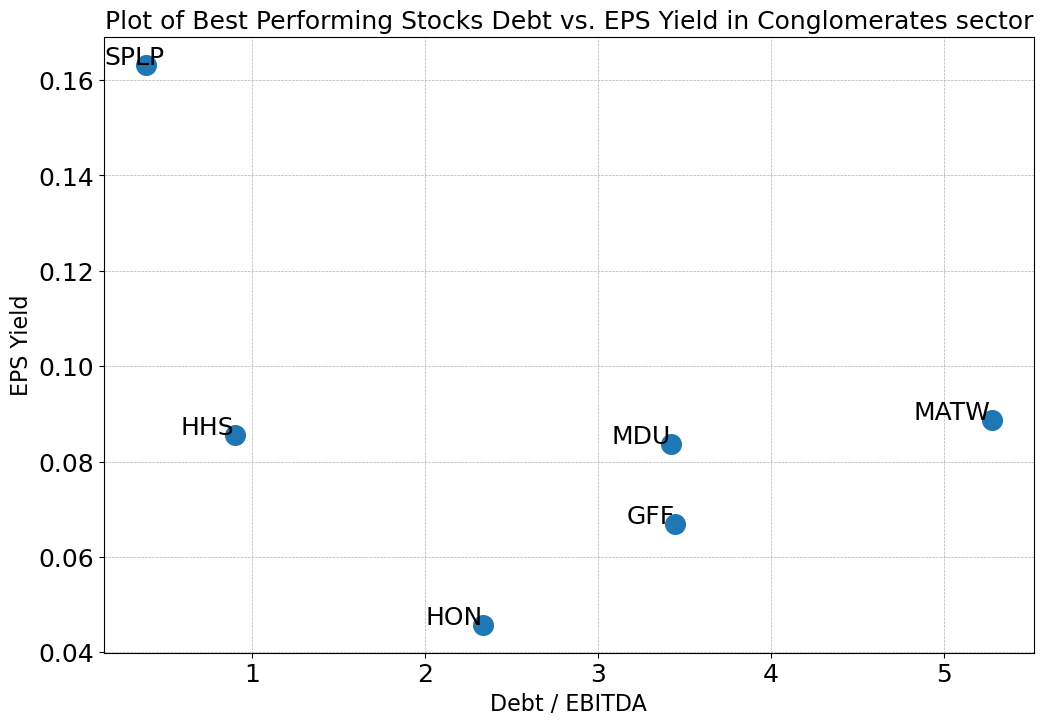

In [55]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('EPS Yield',fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)
scatter = plt.scatter(final_selection['Debt'], final_selection['EPS Yield'], s = 200) 

texts = []
for i, row in final_selection.iterrows():
    texts.append(plt.text(row['Debt'], row['EPS Yield'], row['Code'], fontsize=18, ha='right'))

adjust_text(texts)
sector_title = f'{sector} sector'
plt.title('Plot of Best Performing Stocks Debt vs. EPS Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_EPS_fixed.png', bbox_inches='tight')
plt.show()

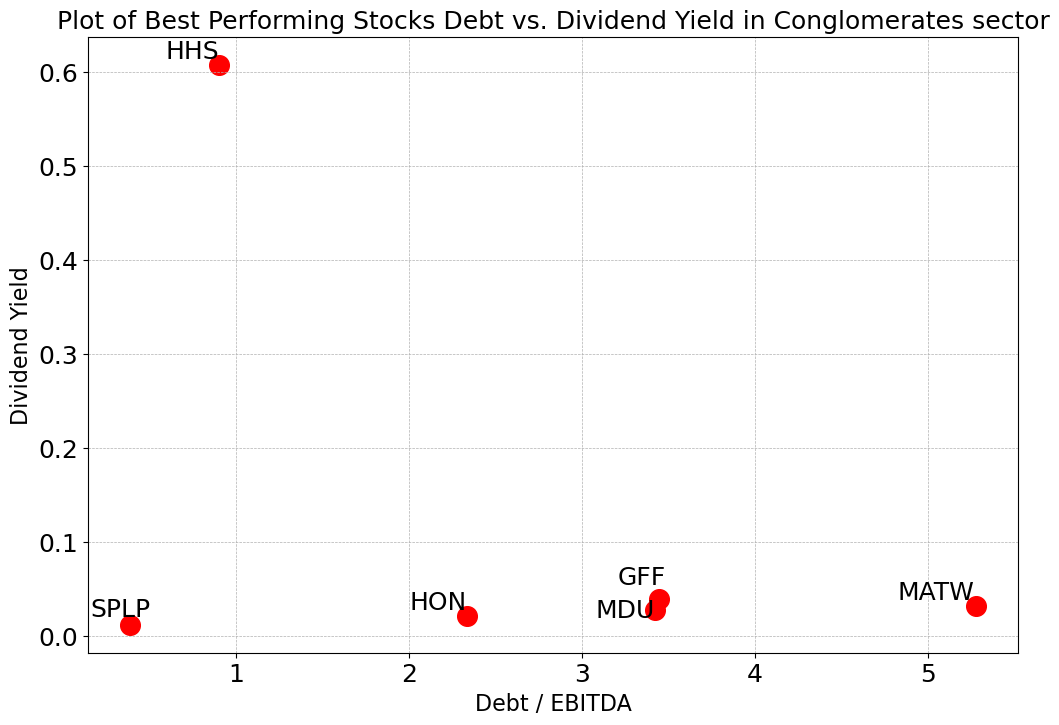

In [56]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('Dividend Yield',fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

plot_data = final_selection[final_selection['Code'] != 'AMTD']
scatter = plt.scatter(plot_data['Debt'], plot_data['Dividend Yield'], c='r',s=200) 

texts = []
for i, row in plot_data.iterrows():
    texts.append(plt.text(row['Debt'], row['Dividend Yield'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)

plt.title('Plot of Best Performing Stocks Debt vs. Dividend Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_Div_fixed.png', bbox_inches='tight')
plt.show()

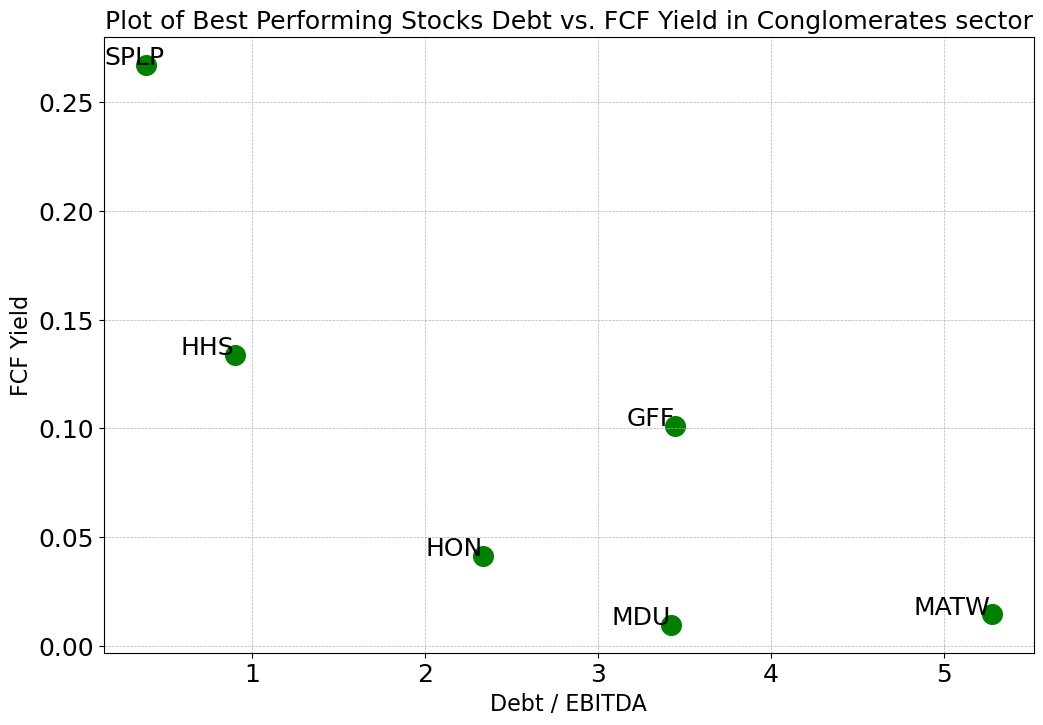

In [57]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('FCF Yield',fontsize=16)
scatter = plt.scatter(plot_data['Debt'], plot_data['FCF'], c='g',s=200) 
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

texts = []
for i, row in plot_data.iterrows():
    texts.append(plt.text(row['Debt'], row['FCF'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)


plt.title('Plot of Best Performing Stocks Debt vs. FCF Yield in ' + sector_title , fontsize=18)
plt.savefig('Best_Debt_FCF_fixed.png', bbox_inches='tight')
plt.show()

In [36]:
today = '2024-06-03'
days_60 = '2024-04-04'
days_120 = '2024-02-05'
days_year = '2023-06-06'
def get_returns(stock,date,index='.US'):
    code = stock['General']['Code']
    price = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=date, to_date=date)[0]['adjusted_close'])
    price_today = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=today, to_date=today)[0]['adjusted_close'])
    returns = (price_today - price) / price
    return returns

In [37]:
def get_all_returns(stock,index='.US'):
    stock_returns = []
    stock_returns.append(get_returns(stock, days_60, index))
    stock_returns.append(get_returns(stock, days_120, index))
    stock_returns.append(get_returns(stock, days_year,index))
    return stock_returns

In [38]:
stocks_Best = []
for index, row in final_selection.iterrows():
    code = row['Code']
    print(code)
    stock = api.get_fundamentals_data(code)
    stocks_Best.append(stock)


SPLP
HHS
HON
MDU
GFF
MATW


In [39]:
all_returns = []
for stock in stocks_Best:
    try:
        all_returns.append(get_all_returns(stock))
    except Exception as e:
        print(f"{stock['General']['Code']} FCF error: {e}")
        continue


In [40]:
GSPC_returns = []

price_60 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_60, to_date=days_60)[0]['adjusted_close'])
price_today = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=today, to_date=today)[0]['adjusted_close'])
price_120 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_120, to_date=days_120)[0]['adjusted_close'])
price_year = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_year, to_date=days_year)[0]['adjusted_close'])
GSPC_returns.append((price_today - price_60) / price_60)
GSPC_returns.append((price_today - price_120) / price_120)
GSPC_returns.append((price_today - price_year) / price_year)
print(GSPC_returns)

[0.026458974862109824, 0.0689061066699691, 0.2333297796764646]


In [41]:
all_returns.append(GSPC_returns)

In [42]:
code_list = []
for stock in stocks_Best:
    code_list.append(stock['General']['Code'])
code_list.append('GSPC')

In [43]:
df_returns = pd.DataFrame(all_returns, columns=['60 Days', '120 Days', '1 Year'])
df_returns.insert(0, 'Code', code_list)
filename = f'returns_{sector}.csv'
df_returns.to_csv(filename, index=False)

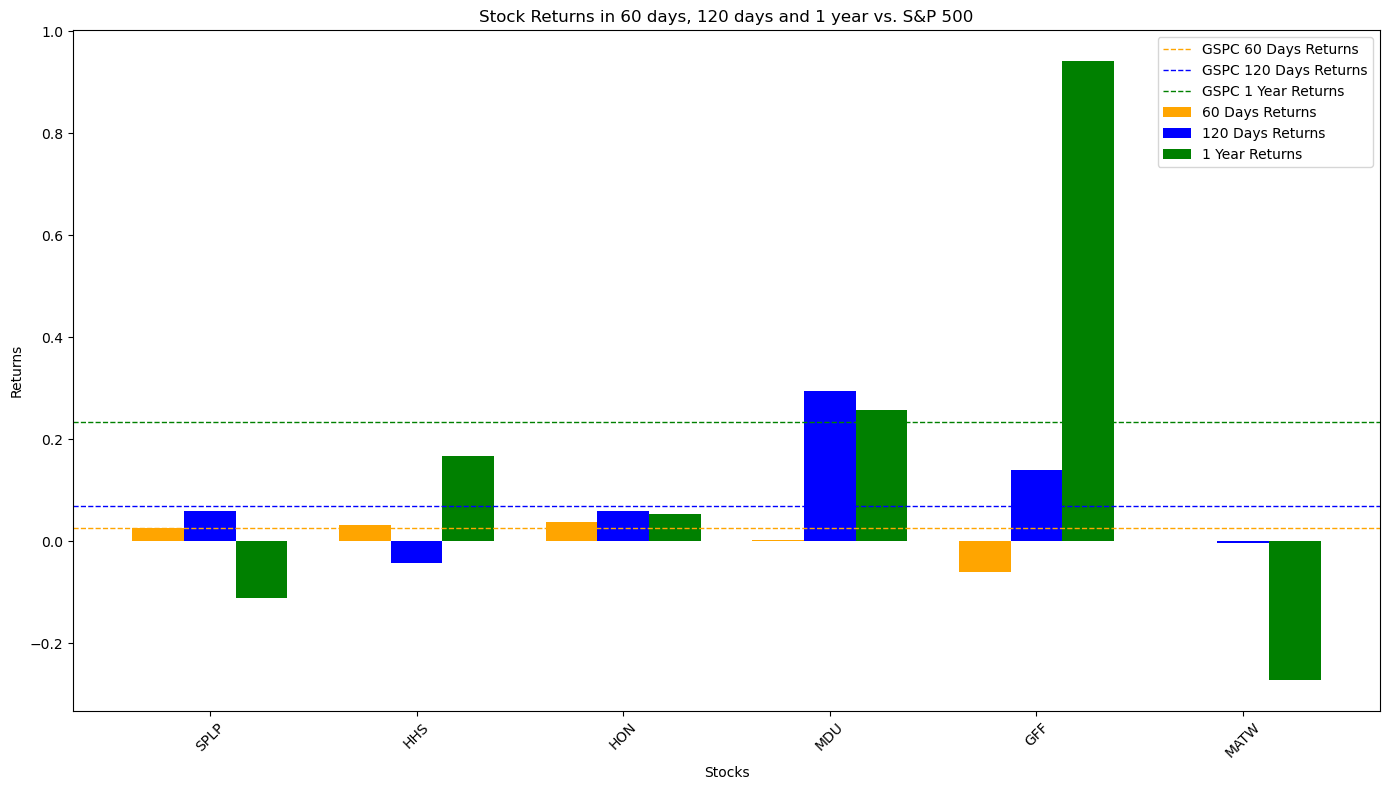

In [44]:
import numpy as np
import matplotlib.pyplot  as plt

plot_data = df_returns.iloc[:-1]

bar_width = 0.25  
index = np.arange(len(plot_data['Code'])) 

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(index - bar_width, plot_data['60 Days'], bar_width, label='60 Days Returns', color = 'orange')
rects2 = ax.bar(index, plot_data['120 Days'], bar_width, label='120 Days Returns', color = 'blue')
rects3 = ax.bar(index + bar_width, plot_data['1 Year'], bar_width, label='1 Year Returns', color = 'green')

ax.axhline(y=GSPC_returns[0], color='orange', linestyle='--', linewidth=1, label='GSPC 60 Days Returns')
ax.axhline(y=GSPC_returns[1], color='blue', linestyle='--', linewidth=1, label='GSPC 120 Days Returns')
ax.axhline(y=GSPC_returns[2], color='green', linestyle='--', linewidth=1, label='GSPC 1 Year Returns')

ax.set_xlabel('Stocks')
ax.set_ylabel('Returns')
ax.set_title('Stock Returns in 60 days, 120 days and 1 year vs. S&P 500')
ax.set_xticks(index)
ax.set_xticklabels(plot_data['Code'], rotation=45) 
ax.legend() 

plt.tight_layout() 
plt.savefig('Returns_.png')
plt.show()

In [45]:
size = plot_data['60 Days'].size
benefit_60_days = np.sum(plot_data['60 Days'])/size
benefit_120_days = np.sum(plot_data['120 Days'])/size
benefit_1_year = np.sum(plot_data['1 Year'])/size
benefit_GPSC_60 = GSPC_returns[0]
benefit_GPSC_120 = GSPC_returns[1]
benefit_GPSC_1_Y = GSPC_returns[2]
print(f"Return for Investing in Best-9-Stocks Portfolios in 60 days is {benefit_60_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 60 days is {benefit_GPSC_60 * 100:.2f}%")
print(f"Return for Investing in Best-9-Stocks Portfolios in 120 days is {benefit_120_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 120 days is {benefit_GPSC_120 * 100:.2f}%")
print(f"Return for Investing in Best-9-Stocks Portfolios in 1 year is {benefit_1_year * 100:.2f}%")
print(f"Return for Investing in S&P500 in 1 year is {benefit_GPSC_1_Y * 100:.2f}%")

Return for Investing in Best-9-Stocks Portfolios in 60 days is 0.65%
Return for Investing in S&P500 in 60 days is 2.65%
Return for Investing in Best-9-Stocks Portfolios in 120 days is 8.49%
Return for Investing in S&P500 in 120 days is 6.89%
Return for Investing in Best-9-Stocks Portfolios in 1 year is 17.28%
Return for Investing in S&P500 in 1 year is 23.33%


In [8]:
GSPC_List = pd.read_csv('../GSPC.csv')
date_list = GSPC_List['Date']
GSPC_returns = GSPC_List['Returns']
code_list = final_selection['Code']
print(code_list)

0    SPLP
2     HHS
4     HON
6     MDU
7     GFF
9    MATW
Name: Code, dtype: object


In [9]:
error_list = []
def get_price_list(stock, time_list, initial_price):
    price_list = []
    error_list = []
    previous_price = initial_price
    previous_returns = 0 

    for date in time_list:
        try:
            price = float(api.get_eod_historical_stock_market_data(symbol=stock, from_date=date, to_date=date)[0]['adjusted_close'])
            returns = (price - initial_price) / initial_price
            price_list.append([date, price, returns])
            previous_price = price
            previous_returns = returns
        except Exception as e:
            error_list.append([stock, date])
            price_list.append([date, previous_price, previous_returns])
            print(f'{stock} on {date} error: {e}')
            continue
    
    return price_list, error_list

all_profolio = []

for s in code_list:
    try:
        initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[0], to_date = date_list[0])[0]['adjusted_close'])
    except Exception as e:
        print(f'{s} cannot get initial price')
        initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[1], to_date = date_list[1])[0]['adjusted_close'])
        continue
    stock_performance, error_list = get_price_list(s, date_list, initial_price)
    if error_list:
        print(error_list)
    returns = [sublist[2] for sublist in stock_performance]
    all_profolio.append(returns)

print(len(all_profolio))

6


In [10]:
import numpy as np
n = len(date_list)
sum = np.zeros(n) 
for i in all_profolio:
    returns = np.array(i)
    sum += returns
total = sum / len(all_profolio)
print(total)

[ 0.          0.03909927  0.03614327  0.01942606  0.07225895  0.07248465
  0.07693559  0.0945877   0.08499639  0.08298496  0.06129526  0.04740999
  0.04699315  0.04756242  0.02458657  0.04447607  0.03726922  0.02113847
  0.02533302  0.00974317 -0.01417818  0.00173067  0.02714923  0.02875416
  0.04264677  0.04813227  0.09063236  0.08296691  0.12607191  0.16001422
  0.14500587  0.13595479  0.11354357  0.1363792   0.14523344  0.10224232
  0.16920947  0.1639355   0.17696942  0.18912722  0.17947     0.1945677
  0.21710474  0.22863922  0.21559255  0.16237216  0.16032496  0.1701147
  0.18601758  0.20445645  0.22414516  0.19868073  0.20030028]


In [11]:
import json
listofcodes = [code for code in code_list.tolist() if code != 'KLG']
all_returns_dict = {listofcodes[i]: all_profolio[i] for i in range(len(all_profolio))}
all_returns_dict['Average'] = total.tolist()

with open('returns.json', 'w') as json_file:
    json.dump(all_returns_dict, json_file, indent=4)

In [12]:
import pandas as pd

df = pd.read_json('returns.json')
total = df['Average']
sector_title = sector + ' Sector'
std = np.std(total)
print(f'Standard Deviation of {sector_title} is: ', std)

Standard Deviation of Conglomerates Sector is:  0.07088112614226603


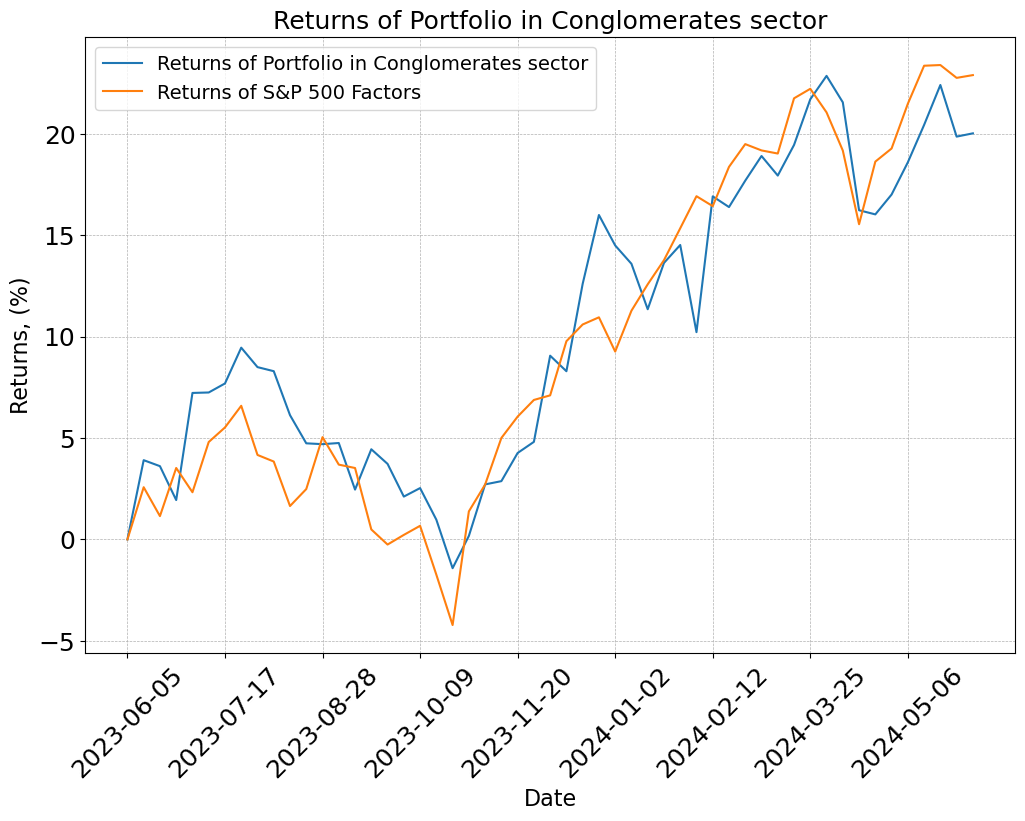

In [13]:
import matplotlib.pyplot as plt
weeks = range(len(date_list))
sector_title = f'{sector} sector'
plt.figure(figsize=(12, 8))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Returns, (%)',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(which='both', linestyle='--', linewidth=0.5)


plt.plot(date_list, total * 100, label = f'Returns of Portfolio in {sector_title}')
plt.plot(date_list, GSPC_returns*100, label = f'Returns of S&P 500 Factors')
plt.legend(fontsize=14)
plt.title('Returns of Portfolio in ' + sector_title , fontsize=18)

interval = 6 
plt.xticks(ticks=date_list[::interval], labels=date_list[::interval], rotation=45)
plt.savefig('Portfolio_Returns', bbox_inches='tight')
plt.show()